# Analyse the results

In [1]:
import os
import numpy as np
from collections import defaultdict

In [2]:
def list_dir(path):
    return list(filter(lambda f: not f.startswith('.'), os.listdir(path)))

def read_results(path):
    results = []
    with open(path, 'r') as f:
        for l in f.readlines():
            r = float(l)
            results.append(r)
    return results

In [3]:
return_types = set()
step_sizes_types = set()

results_folder = "results"
seeds = list_dir(results_folder)

results_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

# Structure is: seed/return_function/num_steps/learning_rate.txt
for s in seeds:
    seed_folder = os.path.join(results_folder, str(s))
    returns = list_dir(seed_folder)
    # various return types
    for r in returns:
        return_types.add(r)
        
        returns_folder = os.path.join(seed_folder, str(r))
        step_sizes = list_dir(returns_folder)
        # various step sizes
        for ns in step_sizes:
            step_sizes_types.add(ns)
            
            step_sizes_folder = os.path.join(returns_folder, str(ns))
            files = list_dir(step_sizes_folder)
            # each file has a different learning rate
            for file in files:
                # get the number after 0.
                learning_rate = file.split(".")[1]
                filepath = os.path.join(step_sizes_folder, file)
                results = read_results(filepath)
                
                # we append all the seeds to the same list
                for result in results:
                    results_dict[r][ns][learning_rate].append(result)

## Find the best learning rate for every step size and return combination

In [4]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# print(color.BOLD + 'Hello World !' + color.END)

In [5]:
for r in return_types:
    best_num_steps = 0
    best_global_mean = 0
    best_global_lr = 0
    
    for ns in step_sizes_types:
        best_lr = 0
        best_mean = 0
        
        for lr in results_dict[r][ns].keys():
            results = np.array(results_dict[r][ns][lr])
            
            mean = np.mean(results)
            median = np.median(results)
            std = np.std(results)
            print(f"Return: {r}\tnum_steps: {ns}\tlr: {lr}\tmean: {mean:.2f}\tmedian: {median}\tstd: {std:.2f}")
            
            # track which learning rate is best for this num_steps
            if mean > best_mean:
                best_mean = mean
                best_lr = lr

        # track which num_steps is best
        if best_mean > best_global_mean:
            best_num_steps = ns
            best_global_mean = best_mean
            best_global_lr = best_lr
        print(f"Finished for return: {r}, num_steps: {ns}")    
        print(f"Final result for num_steps: {ns}\treturn: {r}\tnum_steps: {ns}\t\tBest lr: {best_lr}\tBest mean: {best_mean:.2f}")
    
    print("\n"+"#"*30)    
    print(f"Finished for return: {r}")
    print(color.BOLD+f"Final result for return: {r}\tBest num_steps: {best_num_steps}\tBest lr: {best_global_lr}\tBest mean: {best_global_mean:.2f}"+color.END)
    print("#"*30+"\n")

Return: GAE	num_steps: 150	lr: 01	mean: 168.37	median: 183.85000000000002	std: 42.51
Return: GAE	num_steps: 150	lr: 03	mean: 180.73	median: 200.0	std: 34.87
Return: GAE	num_steps: 150	lr: 07	mean: 181.86	median: 200.0	std: 30.90
Return: GAE	num_steps: 150	lr: 05	mean: 177.27	median: 196.60000000000002	std: 32.77
Finished for return: GAE, num_steps: 150
Final result for num_steps: 150	return: GAE	num_steps: 150		Best lr: 07	Best mean: 181.86
Return: GAE	num_steps: 1	lr: 01	mean: 24.26	median: 10.4	std: 29.53
Return: GAE	num_steps: 1	lr: 03	mean: 25.16	median: 25.55	std: 14.80
Return: GAE	num_steps: 1	lr: 07	mean: 23.40	median: 25.55	std: 9.27
Return: GAE	num_steps: 1	lr: 05	mean: 23.55	median: 24.9	std: 10.47
Finished for return: GAE, num_steps: 1
Final result for num_steps: 1	return: GAE	num_steps: 1		Best lr: 03	Best mean: 25.16
Return: GAE	num_steps: 200	lr: 01	mean: 170.29	median: 191.75	std: 40.35
Return: GAE	num_steps: 200	lr: 03	mean: 187.44	median: 200.0	std: 25.50
Return: GAE	n

# Split on seed as well

In [6]:
return_types = set()
step_sizes_types = set()

results_folder = "results"
seeds = list_dir(results_folder)

results_dict_with_seed = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(list))))

# Structure is: seed/return_function/num_steps/learning_rate.txt
for s in seeds:
    seed_folder = os.path.join(results_folder, str(s))
    returns = list_dir(seed_folder)
    # various return types
    for r in returns:
        return_types.add(r)
        
        returns_folder = os.path.join(seed_folder, str(r))
        step_sizes = list_dir(returns_folder)
        # various step sizes
        for ns in step_sizes:
            step_sizes_types.add(ns)
            
            step_sizes_folder = os.path.join(returns_folder, str(ns))
            files = list_dir(step_sizes_folder)
            # each file has a different learning rate
            for file in files:
                # get the number after 0.
                learning_rate = file.split(".")[1]
                filepath = os.path.join(step_sizes_folder, file)
                results = read_results(filepath)
                
                # we append all the seeds to the same list
                for result in results:
                    results_dict_with_seed[s][r][ns][learning_rate].append(result)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [15]:
num_steps = [int(i) for i in list(results_dict_with_seed['0']['A'].keys())]
num_steps = [str(i) for i in sorted(num_steps)]

lrs_AE = sorted(list(results_dict_with_seed['0']['A']['200'].keys()))
lrs_GAE = sorted(list(results_dict_with_seed['0']['GAE']['200'].keys()))

In [10]:
best_lr_AE = {}
best_lr_AE_all = {}
for num_step in num_steps:
    best_lr_AE[num_step] = (0, 0)
    best_lr_AE_all[num_step] = []
    
    for lr in lrs_AE:
        a = np.mean(np.array([results_dict_with_seed[s]['A'][num_step][lr] for s in seeds]))
        
        if a > best_lr_AE[num_step][1]:
            best_lr_AE[num_step] = (lr, a)
        
        best_lr_AE_all[num_step].append((lr, a))
            
best_lr_GAE = {}
best_lr_GAE_all = {}
for num_step in num_steps:
    best_lr_GAE[num_step] = (0, 0)
    best_lr_GAE_all[num_step] = []
    
    for lr in lrs_GAE:
        a = np.mean(np.array([results_dict_with_seed[s]['GAE'][num_step][lr] for s in seeds]))
        
        if a > best_lr_GAE[num_step][1]:
            best_lr_GAE[num_step] = (lr, a)
        
        best_lr_GAE_all[num_step].append((lr, a))

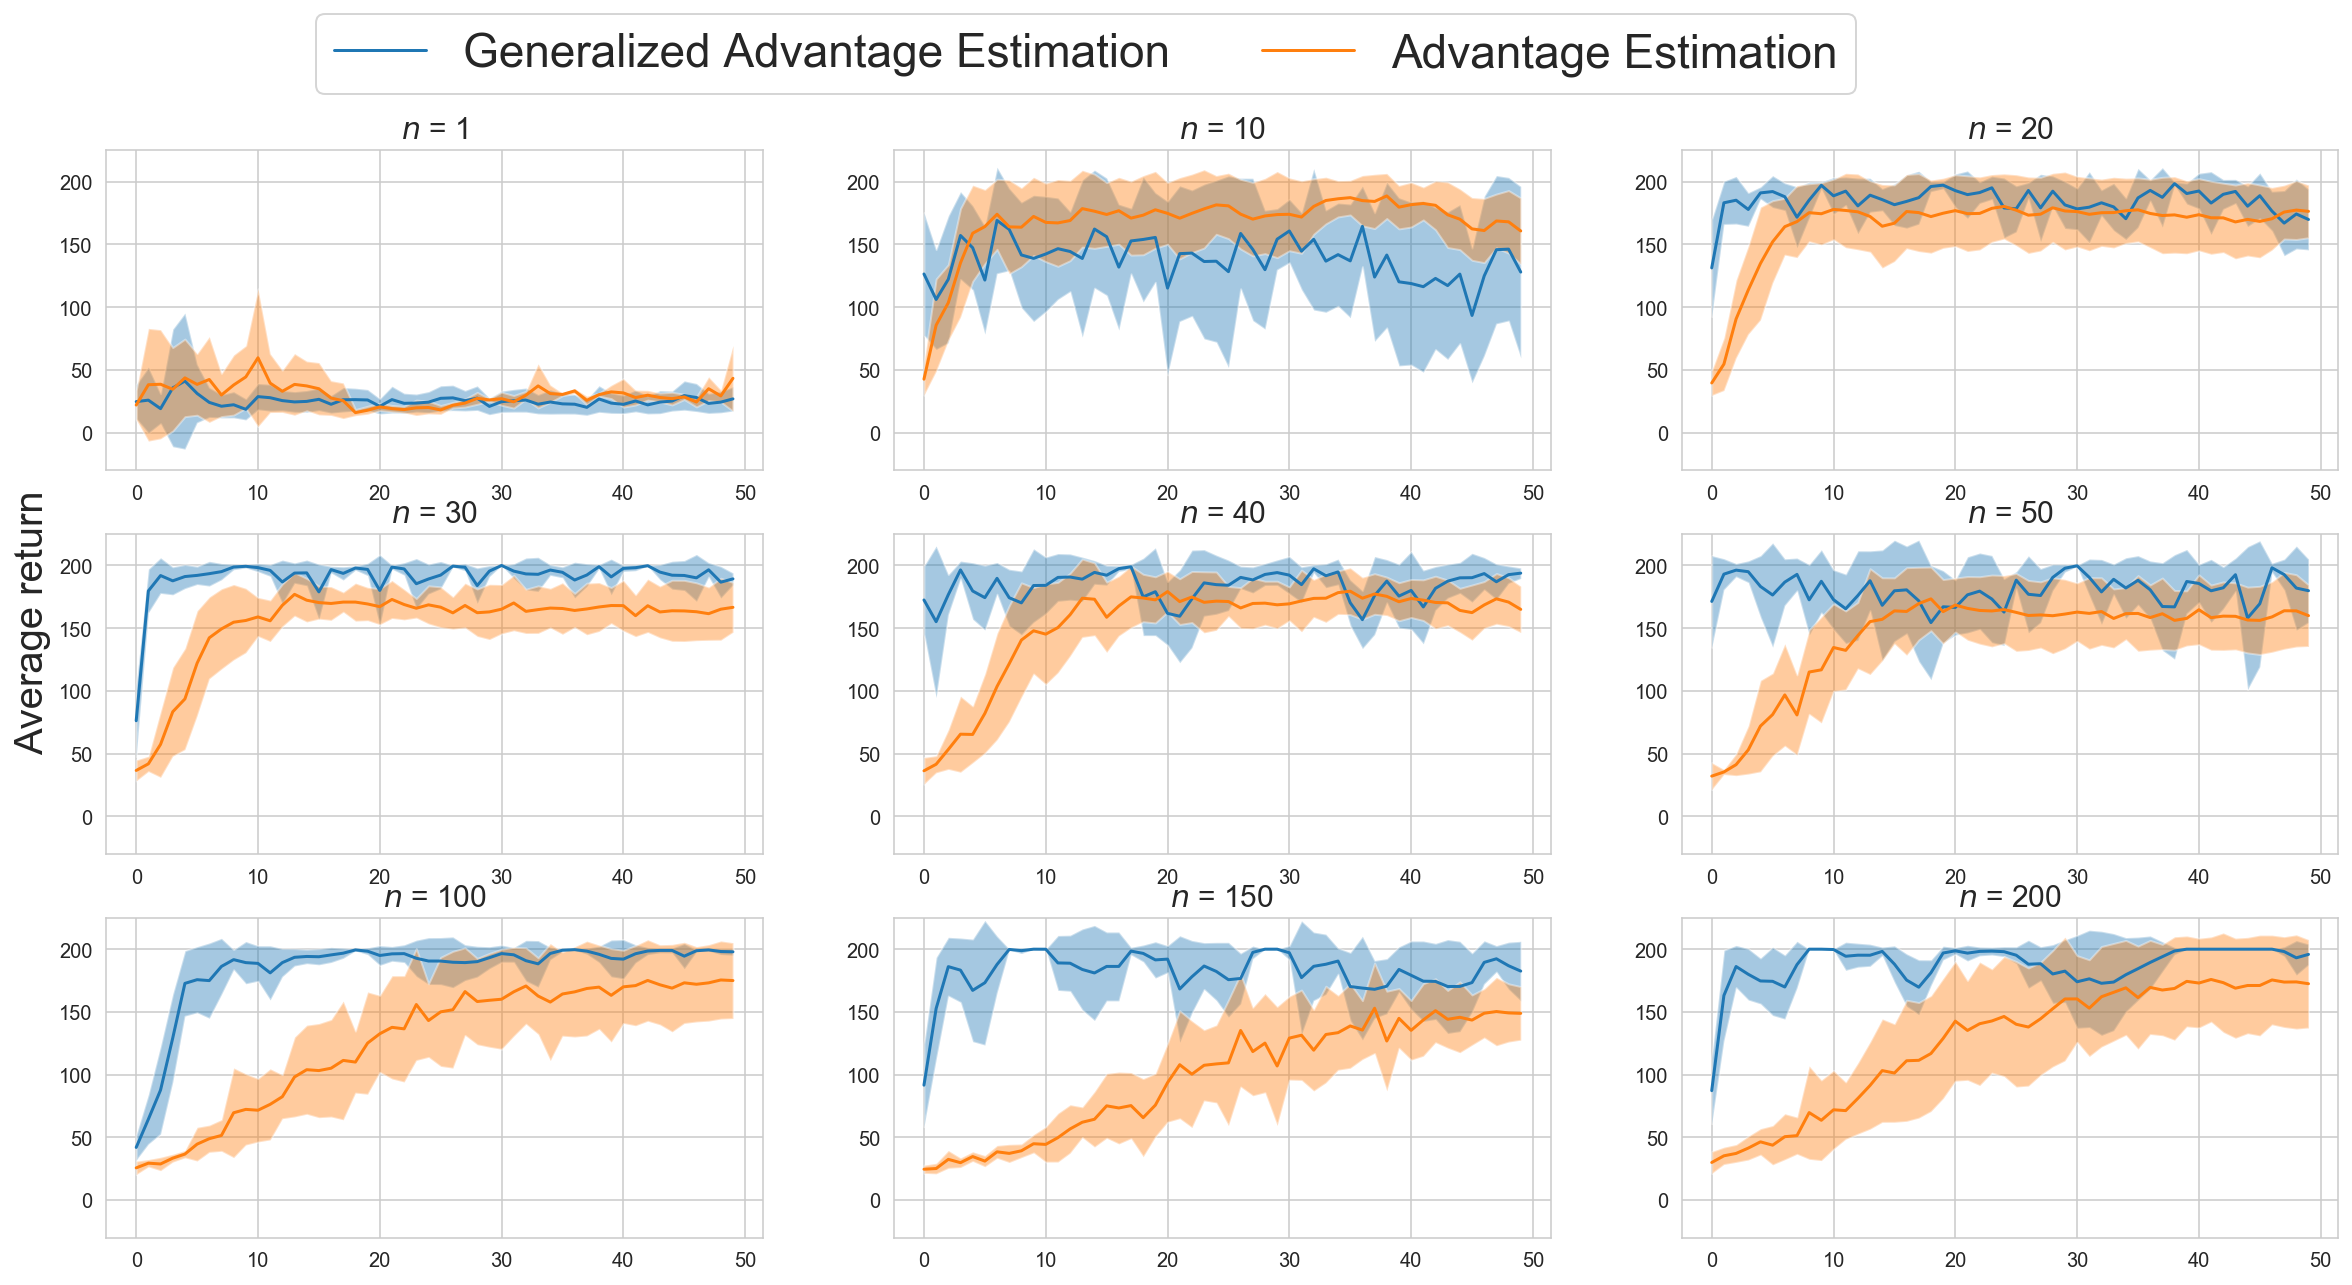

In [17]:
fig = plt.figure(figsize=(20, 10))
#plt.suptitle("Comparison of Advantage Estimations", fontsize=20)

for i, num_step in enumerate(num_steps, start=1):
    best_GAE = np.array([results_dict_with_seed[s]['GAE'][num_step][best_lr_GAE[num_step][0]] for s in seeds])
    mean_GAE = np.array(best_GAE).mean(axis=0)
    var_GAE  = np.array(best_GAE).std(axis=0)
    
    best_AE = np.array([results_dict_with_seed[s]['A'][num_step][best_lr_AE[num_step][0]] for s in ['0', '120', '30', '90']])
    mean_AE = np.array(best_AE).mean(axis=0)
    var_AE  = np.array(best_AE).std(axis=0)
    
    plt.subplot(3, 3, i)
    plt.title(f"$n$ = {num_step}", fontsize=15)
    plt.plot(mean_GAE, label='Generalized Advantage Estimation')
    plt.fill_between(np.arange(0, len(mean_GAE), 1), mean_GAE-var_GAE, mean_GAE+var_GAE, alpha=0.4)
    
    plt.plot(mean_AE, label='Advantage Estimation')
    plt.fill_between(np.arange(0, len(mean_AE), 1), mean_AE-var_AE, mean_AE+var_AE, alpha=0.4)
    plt.ylim(-30, 225)
    if i == 1:
        #plt.legend(prop={'size':23}, ncol=2, bbox_to_anchor=(2.7, -2.5))
        plt.legend(prop={'size':23}, ncol=2, bbox_to_anchor=(2.7, 1.5))
        plt.text(x=65, y=-510, s="Number of steps (in thousands)", fontsize=20)
        plt.text(x=-10, y=-250, s="Average return", rotation=90, fontsize=20)



In [12]:
for num_step in best_lr_GAE:
    print(f"For $n$= {num_step}")

For $n$= 1
For $n$= 10
For $n$= 100
For $n$= 150
For $n$= 20
For $n$= 200
For $n$= 30
For $n$= 40
For $n$= 50
